In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Flatten , Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [4]:
train_dir='data'

train_gen = ImageDataGenerator(rescale = 1./255,rotation_range=0.3,horizontal_flip=True)


train_generator = train_gen.flow_from_directory(train_dir,
                                               target_size = (150 , 150),
                                               batch_size = 20,
                                               class_mode = 'binary')


Found 3309 images belonging to 2 classes.


In [5]:
def get_model(rate):
    
    model = Sequential([
        Conv2D(32 , (3 , 3) , activation = 'relu' , input_shape = (150,150,3)),
        MaxPooling2D((2 , 2)),
        Conv2D(64 , (3 , 3) , activation = 'relu'),
        MaxPooling2D((2 , 2)),
        Conv2D(128 , (3 , 3) , activation = 'relu'),
        MaxPooling2D((2 , 2)),
        Conv2D(128 , (3 , 3) , activation = 'relu'),
        MaxPooling2D((2 , 2)),
        Flatten(),
        BatchNormalization(),
        Dropout(rate),
        Dense(512 , activation = 'relu'),
        BatchNormalization(),
        Dropout(rate),
        Dense(1 , activation = 'sigmoid')
    ])
    
    return model

In [6]:
model = get_model(0.5)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [8]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=200
                             )

Epoch 1/200
100/100 [==============================] - 158s 2s/step - loss: 1.0008 - accuracy: 0.5445
Epoch 2/200
100/100 [==============================] - 112s 1s/step - loss: 0.8383 - accuracy: 0.5777
Epoch 3/200
100/100 [==============================] - 72s 716ms/step - loss: 0.7650 - accuracy: 0.6090
Epoch 4/200
100/100 [==============================] - 59s 587ms/step - loss: 0.7705 - accuracy: 0.5955
Epoch 5/200
100/100 [==============================] - 50s 502ms/step - loss: 0.7050 - accuracy: 0.6139
Epoch 6/200
100/100 [==============================] - 43s 434ms/step - loss: 0.6989 - accuracy: 0.6199
Epoch 7/200
100/100 [==============================] - 51s 505ms/step - loss: 0.6772 - accuracy: 0.6240
Epoch 8/200
100/100 [==============================] - 44s 442ms/step - loss: 0.6841 - accuracy: 0.6135
Epoch 9/200
100/100 [==============================] - 46s 463ms/step - loss: 0.7088 - accuracy: 0.5948
Epoch 10/200
100/100 [==============================] - 46s 461ms/st

100/100 [==============================] - 44s 441ms/step - loss: 0.1759 - accuracy: 0.9240
Epoch 157/200
100/100 [==============================] - 46s 463ms/step - loss: 0.1913 - accuracy: 0.9200
Epoch 158/200
100/100 [==============================] - 43s 429ms/step - loss: 0.1502 - accuracy: 0.9387
Epoch 159/200
100/100 [==============================] - 46s 461ms/step - loss: 0.1791 - accuracy: 0.9281
Epoch 160/200
100/100 [==============================] - 43s 428ms/step - loss: 0.1890 - accuracy: 0.9155
Epoch 161/200
100/100 [==============================] - 46s 461ms/step - loss: 0.1697 - accuracy: 0.9326
Epoch 162/200
100/100 [==============================] - 46s 455ms/step - loss: 0.1677 - accuracy: 0.9296
Epoch 163/200
100/100 [==============================] - 42s 420ms/step - loss: 0.1793 - accuracy: 0.9325
Epoch 164/200
100/100 [==============================] - 43s 429ms/step - loss: 0.1836 - accuracy: 0.9265
Epoch 165/200
100/100 [==============================] - 48s

In [11]:
## Creating a dataframe of history ##

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,1.003069,0.544495
1,0.835575,0.577677
2,0.765039,0.609000
3,0.770543,0.595500
4,0.706388,0.613876


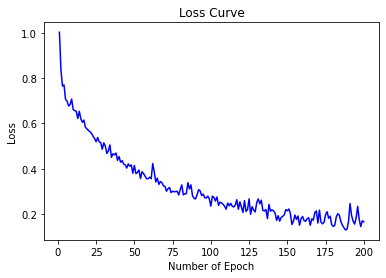

In [17]:
## Plotting the Loss curve ##

epochs = [epoch for epoch in range(1 , 201)]

plt.plot(epochs , df['loss'] , 'b')
plt.title('Loss Curve')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.show()

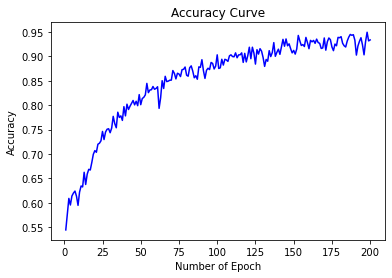

In [18]:
## Plotting the Accuracy curve ##

epochs = [epoch for epoch in range(1 , 201)]

plt.plot(epochs , df['accuracy'] , 'b')
plt.title('Accuracy Curve')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.show()

In [12]:
## Saving the model in h5 format ##

model.save('gender_model.h5')

NameError: name 'model' is not defined

In [11]:
## Testing if the model is okay ##

new_model = load_model('gender_model.h5')
new_model

In [7]:
## Prediction Utility Function ##

def prediction(path):
    img = cv2.imread(path)
    img = cv2.resize(img , (150 , 150) , cv2.INTER_AREA)
    img_arr = img_to_array(img)
    img_arr = img_arr / 255.
    plt.imshow(img_arr)
    plt.show()
    pred = new_model.predict(img_arr.reshape(1 , img_arr.shape[0] , img_arr.shape[1] , img_arr.shape[2] ))
    print(pred)
    if pred > 0.3:
        print('Woman!')
    else:
        print('Man')

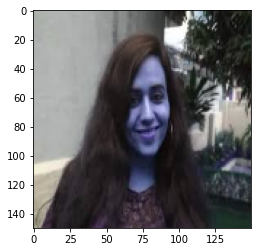

[[0.80748755]]
Woman!


In [36]:
prediction('girl.jpg')

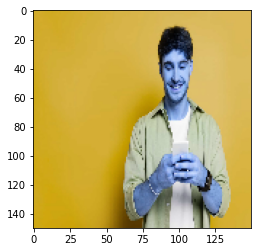

[[0.130837]]
Man


In [26]:
prediction('man.jpg')

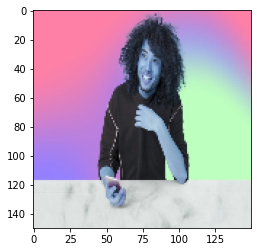

[[0.28444937]]
Man


In [28]:
prediction('man2.jpg')

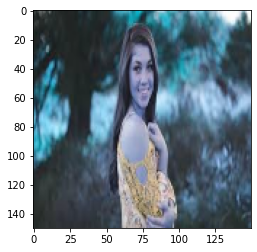

[[0.8995924]]
Woman!


In [29]:
prediction('girl2.jfif')

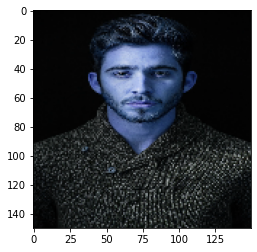

[[0.2627784]]
Man


In [41]:
prediction('man_2.jfif')

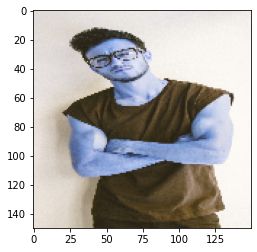

[[0.22137074]]
Man


In [42]:
prediction('man_3.jfif')

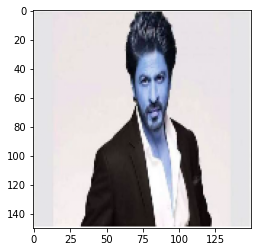

[[0.00283486]]
Man


In [13]:
prediction('srk.jpg')

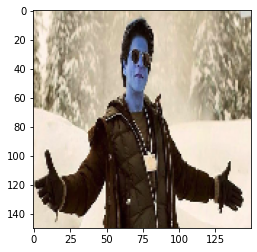

[[0.0033605]]
Man


In [14]:
prediction('srk_2.jpg')

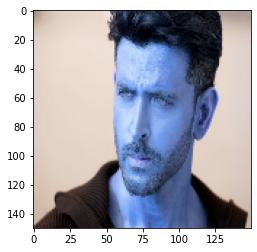

[[0.03102384]]
Man


In [15]:
prediction('hr.jpg')

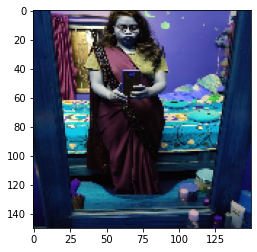

[[0.89854217]]
Woman!


In [20]:
prediction('ind_2.jpg')

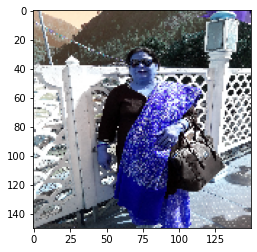

[[0.49003607]]
Woman!


In [23]:
prediction('maa.jpg')

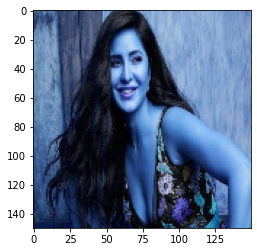

[[0.9415197]]
Woman!


In [26]:
prediction('kat.jpg')